In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

Let's load the dataset, and analyze it:

In [2]:
df = pd.read_csv('good_samples.csv')

df.head(2)

,Account_Domain,Account_Name,Additional_Data,Advanced_Options,Analysis_symbol,Cab_Guid,Cab_Id,ComputerName,Configuration_Access_Policy,Creator_Process_ID,Creator_Process_Name,Disable_Integrity_Checks,EventCode,EventType,Event_Name,Exception_code,Fault_offset,Faulting_application_path,Faulting_application_start_time,Faulting_module_name,Faulting_module_path,Faulting_package_full_name,Faulting_package_relative_application_ID,Faulting_process_id,Flight_Signing,Hashed_bucket,HyperVisor_Debugging,HyperVisor_Launch_Type,HyperVisor_Load_Options,Idle_state_type,Internal_Timing_Sequence,Kernel_Debugging,Keywords,Leap_seconds_enabled,Load_Options,LogName,Logon_ID,Mandatory_Label,Maximum_performance_percentage,Message,MinimumPasswordLength,MinimumPasswordLengthAudit,Minimum_performance_percentage,Minimum_throttle_percentage,New_Process_ID,New_Process_Name,New_leap_second_count,Nominal_Frequency__MHz_,Old_leap_second_count,OpCode,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9,Performance_state_type,Process_Command_Line,Process_ID,Process_Name,Processing_Stats,Reason,Reason_Code,Rechecking_for_solution,RecordNumber,RelaxMinimumPasswordLengthLimits,Report_Id,Report_Status,Response,Saved_Cache,Security_ID,Service_Account,Service_File_Name,Service_Name,Service_Start_Type,Service_Type,Shutdown_Reason,Shutdown_Type,Sid,SidType,SourceName,System_Event_Logging,Target_Process_ID,Target_Process_Name,TaskCategory,Test_Signing,Token_Elevation_Type,Type,User,VSM_Launch_Type,_raw,_time,alert,alert_time,app,category,date_hour,date_mday,date_minute,date_month,date_second,date_wday,date_year,date_zone,display_fields,earliest,eventSearch,eventtype,field_list{},fields{}.Account_Domain,fields{}.Account_Name,fields{}.Additional_Data,fields{}.Advanced_Options,fields{}.Analysis_symbol,fields{}.Cab_Guid,fields{}.Cab_Id,fields{}.ComputerName,fields{}.Configuration_Access_Policy,fields{}.Creator_Process_ID,fields{}.Creator_Process_Name,fields{}.Disable_Integrity_Checks,fields{}.EventCode,fields{}.EventType,fields{}.Event_Name,fields{}.Exception_code,fields{}.Fault_offset,fields{}.Faulting_application_path,fields{}.Faulting_application_start_time,fields{}.Faulting_module_name,fields{}.Faulting_module_path,fields{}.Faulting_package_full_name,fields{}.Faulting_package_relative_application_ID,fields{}.Faulting_process_id,fields{}.Flight_Signing,fields{}.Hashed_bucket,fields{}.HyperVisor_Debugging,fields{}.HyperVisor_Launch_Type,fields{}.HyperVisor_Load_Options,fields{}.Idle_state_type,fields{}.Internal_Timing_Sequence,fields{}.Kernel_Debugging,fields{}.Keywords,fields{}.Leap_seconds_enabled,fields{}.Load_Options,fields{}.LogName,fields{}.Logon_ID,fields{}.Mandatory_Label,fields{}.Maximum_performance_percentage,fields{}.Message,fields{}.MinimumPasswordLength,fields{}.MinimumPasswordLengthAudit,fields{}.Minimum_performance_percentage,fields{}.Minimum_throttle_percentage,fields{}.New_Process_ID,fields{}.New_Process_Name,fields{}.New_leap_second_count,fields{}.Nominal_Frequency__MHz_,fields{}.Old_leap_second_count,fields{}.OpCode,fields{}.P1,fields{}.P10,fields{}.P2,fields{}.P3,fields{}.P4,fields{}.P5,fields{}.P6,fields{}.P7,fields{}.P8,fields{}.P9,fields{}.Performance_state_type,fields{}.Process_Command_Line,fields{}.Process_ID,fields{}.Process_Name,fields{}.Reason,fields{}.Reason_Code,fields{}.Rechecking_for_solution,fields{}.RecordNumber,fields{}.RelaxMinimumPasswordLengthLimits,fields{}.Report_Id,fields{}.Report_Status,fields{}.Response,fields{}.Saved_Cache,fields{}.Security_ID,fields{}.Service_Account,fields{}.Service_File_Name,fields{}.Service_Name,fields{}.Service_Start_Type,fields{}.Service_Type,fields{}.Shutdown_Reason,fields{}.Shutdown_Type,fields{}.Sid,fields{}.SidType,fields{}.SourceName,fields{}.System_Event_Logging,fields{}.Target_Process_ID,fields{}.Target_Process_Name,fields{}.TaskCategory,fields{}.Test_Signing,fields{}.Token_Elevation_Type,fields{}.Type,fields{}.User,fields{}.VSM_Launch_Type,fields{}._confstr,fields{}._eventtype_color,fields{}._indextime,fields{}._pre_ms

Let's check what types of windows logs we are dealing with:

([<matplotlib.patches.Wedge at 0x28d539a0d90>,
 [Text(0.19101298416420226, 1.083288530300532, 'System'),
  Text(-1.0433900938509704, 0.34833477009001484, 'Setup'),
  Text(-0.4266301656049422, -1.013896790504783, 'Application'),
  Text(1.0656370719193207, -0.27279595112687555, 'Security')],
 [Text(0.10418890045320121, 0.5908846528911992, '44%'),
  Text(-0.5691218693732565, 0.1900007836854626, '1%'),
  Text(-0.23270736305724118, -0.5530346130026088, '47%'),
  Text(0.5812565846832658, -0.14879779152375028, '8%')])

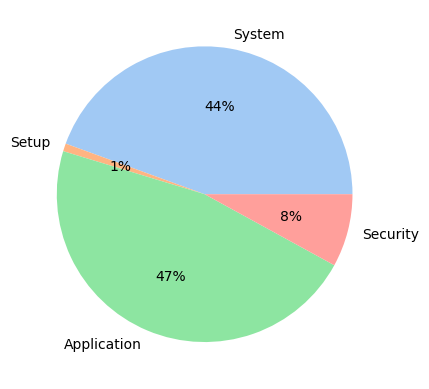

In [3]:
# Collect the lof type from every log in the dataset
list_of_types = []
for i, j in df.iterrows():
    list_of_types.append(re.search('LogName=(.*)\n', j['_raw']).group(1))

# Show how the log types are divided
colors = sns.color_palette('pastel')[0:5]
set_of_types = set(list_of_types)
values = [list_of_types.count(x) for x in set_of_types]
plt.pie(values, labels = set_of_types, colors = colors, autopct='%.0f%%')
plt.show()

Let's check which common fields we have in all of the log types:

In [4]:
category_set = set()
category_set.add('Message') # every log has a message field

raw_data = [x.replace('=', ' ') for x in df['_raw'].tolist()]

# thanks to Bing Wang from StackOverflow
# link: https://stackoverflow.com/questions/66572861/find-words-that-appear-in-multiple-strings
counter = Counter([w for l in raw_data for w in set(l.split())])

counter

Counter({'OpCode': 351,
         'EventType': 351,
         'Type': 351,
         'ComputerName': 351,
         'EventCode': 351,
         'LogName': 351,
         'Keywords': 351,
         'TaskCategory': 351,
         'RecordNumber': 351,
         'Message': 351,
         'SourceName': 351,
         'CLIENT-PC': 351,
         'Information': 332,
         '4': 300,
         'None': 292,
         '0': 211,
         'The': 197,
         'Info': 192,
         'Classic': 182,
         'User': 180,
         '09/21/2023': 180,
         'PM': 180,
         'AM': 172,
         '09/22/2023': 171,
         'Application': 164,
         'System': 158,
         'NOT_TRANSLATED': 155,
         'SidType': 155,
         'Sid': 155,
         'S-1-5-18': 152,
         'service': 118,
         'has': 111,
         'Microsoft-Windows-Security-SPP': 108,
         'the': 99,
         'was': 94,
         'and': 89,
         'in': 76,
         'successfully': 73,
         '1': 71,
         'Protection': 68,


As we can see, we have many field, but not all of them appear in all of the logs.
So let's try to extract the fields that do appear in all of the logs:

In [5]:
common_fields = [x[0] for x in counter.most_common() if x[1] == len(raw_data)]
print('The list of fields that appear in all the logs are:\n', [x[0] for x in counter.most_common() if x[1] == len(raw_data)])
print('And the number of fields is: ', len(common_fields))

The list of fields that appear in all the logs are:
 ['OpCode', 'EventType', 'Type', 'ComputerName', 'EventCode', 'LogName', 'Keywords', 'TaskCategory', 'RecordNumber', 'Message', 'SourceName', 'CLIENT-PC']
And the number of fields is:  12


<u>Note:</u>
1. 'CLIENT-PC' is not a real field, so we can safely ignore it.<br>
2. We can also add the Date and Time as features.<br>

So, in conclusion, we have 13 different fields that appear in all the log types.<br>
Now let's build the dataset with those fields as features.

In [6]:
LogName = []
Date = []
Time = []
ComputerName = []
SourceName = []
TaskCategory = []
EventType = []
Message = []
Keywords = []
OpCode = []
EventCode = []
Type = []
RecordNumber = []

for i in range(0,len(df)):
    current_log = df.iloc[i]['_raw']
    Date.append(current_log[0:10])
    Time.append(current_log[11:22])
    LogName.append(re.search('LogName=(.*)\n', current_log).group(1))
    ComputerName.append(re.search('ComputerName=(.*)\n', current_log).group(1))
    SourceName.append(re.search('SourceName=(.*)\n', current_log).group(1))
    TaskCategory.append(re.search('TaskCategory=(.*)\n', current_log).group(1))
    EventType.append(re.search('EventType=(.*)\n', current_log).group(1))
    Keywords.append(re.search('Keywords=(.*)\n', current_log).group(1))
    OpCode.append(re.search('OpCode=(.*)\n', current_log).group(1))
    EventCode.append(re.search('EventCode=(.*)\n', current_log).group(1))
    Type.append(re.search('Type=(.*)\n', current_log).group(1))
    RecordNumber.append(re.search('RecordNumber=(.*)\n', current_log).group(1))
    Message.append(re.search('Message=(.*)', current_log).group(1))

df_cleaned = pd.DataFrame({ 'LogName' : LogName,
                         'Date' : Date,
                         'Time' : Time,
                         'ComputerName' : ComputerName,
                         'SourceName' : SourceName,
                         'TaskCategory' : TaskCategory,
                         'EventType' : EventType,
                         'Keywords' : Keywords,
                         'OpCode' : OpCode,
                         'EventCode' : EventCode,
                         'Type' : Type,
                         'RecordNumber' : RecordNumber,
                         'Message' : Message })

df_cleaned.head(5)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message
0,Application,09/22/2023,12:10:15 AM,CLIENT-PC,Microsoft-Windows-Security-SPP,None,4,Classic,None,16384,4,3267,Successfully scheduled Software Protection ser...
1,System,09/22/2023,12:10:01 AM,CLIENT-PC,Microsoft-Windows-Kernel-General,None,4,None,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...
2,Application,09/22/2023,12:09:45 AM,CLIENT-PC,SecurityCenter,None,4,Classic,Info,15,4,3266,Updated Windows Defender status successfully t...
3,System,09/22/2023,12:09:23 AM,CLIENT-PC,Microsoft-Windows-Kernel-General,None,4,None,Info,16,4,2278,The access history in hive \??\C:\Users\Commun...
4,Application,09/22/2023,12:09:20 AM,CLIENT-PC,Microsoft-Windows-Security-SPP,None,2,Classic,None,8198,2,3265,License Activation (slui.exe) failed with the ...


Let's fix some of the features types:

In [7]:
df_cleaned['EventType'] = df_cleaned['EventType'].astype(int)
df_cleaned['EventCode'] = df_cleaned['EventCode'].astype(int)
df_cleaned['Type'] = df_cleaned['Type'].astype(int)
df_cleaned['RecordNumber'] = df_cleaned['RecordNumber'].astype(int)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%I:%M:%S %p').dt.time

df_cleaned.dtypes

LogName                 object
Date            datetime64[ns]
Time                    object
ComputerName            object
SourceName              object
TaskCategory            object
EventType                int32
Keywords                object
OpCode                  object
EventCode                int32
Type                     int32
RecordNumber             int32
Message                 object
dtype: object

Now let's save the new dataset as <b>'good_samples_cleaned.csv'</b>:

In [8]:
df_cleaned.to_csv('good_samples_cleaned.csv', index=False)